    Species  Weight  Length   Height   Width
0     Bream   242.0    25.4  11.5200  4.0200
1     Bream   290.0    26.3  12.4800  4.3056
2     Bream   340.0    26.5  12.3778  4.6961
3     Bream   363.0    29.0  12.7300  4.4555
4     Bream   430.0    29.0  12.4440  5.1340
..      ...     ...     ...      ...     ...
154   Smelt    12.2    12.2   2.0904  1.3936
155   Smelt    13.4    12.4   2.4300  1.2690
156   Smelt    12.2    13.0   2.2770  1.2558
157   Smelt    19.7    14.3   2.8728  2.0672
158   Smelt    19.9    15.0   2.9322  1.8792

[159 rows x 5 columns]
    Species  Weight  Length   Height   Width
72    Perch     5.9     8.4   2.1120  1.4080
73    Perch    32.0    13.7   3.5280  1.9992
74    Perch    40.0    15.0   3.8240  2.4320
75    Perch    51.5    16.2   4.5924  2.6316
76    Perch    70.0    17.4   4.5880  2.9415
77    Perch   100.0    18.0   5.2224  3.3216
78    Perch    78.0    18.7   5.1992  3.1234
79    Perch    80.0    19.0   5.6358  3.0502
80    Perch    85.0    19.6   5

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44172 missing from curre

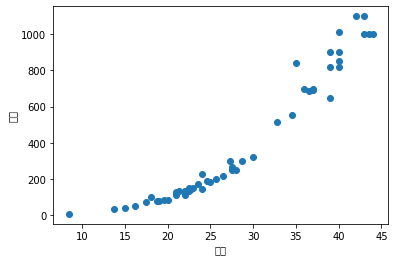

[[279.]]


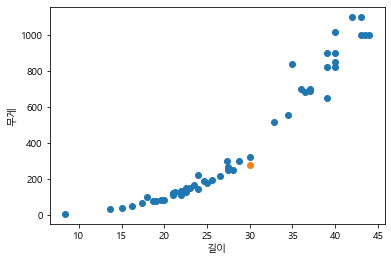

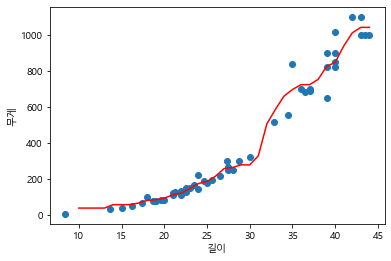

0.9793648682718722
30.569285714285716


In [1]:
#### k-최근접 이웃 회귀_구현_소스 코드 ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## 내가 관리하는 모든 생선들의 데이터 확인해보기 ##
fish_all = pd.read_csv('Fish.csv')
print(fish_all)


## 생선 데이터 중, 농어(Perch) 데이터 확인해보기 ##
print(fish_all[fish_all['Species'] == 'Perch'])


## 농어 데이터 추출하기 ## 
fish_perch = fish_all[fish_all['Species'] == 'Perch'] 


## 학습에 사용할 데이터 준비하기 : 농어의 '길이 (Length)' = 독립 변수 ##
perch_length = fish_perch['Length']
print(perch_length.shape)

perch_length = perch_length.to_numpy()
perch_length = perch_length.reshape(-1, 1)
print(perch_length.shape)

print(perch_length[:5])


## 학습에 사용할 데이터 준비하기 : 농어의 '무게 (Weight)' = 종속 변수 ##
perch_weight = fish_perch['Weight']
print(perch_weight.shape)

perch_weight = perch_weight.to_numpy() 
perch_weight = perch_weight.reshape(-1, 1)
print(perch_weight.shape)

print(perch_weight[:5])


## 준비한 농어 데이터 분포 확인해보기 : 독립 변수 = 길이, 종속 변수 = 무게 ##
plt.scatter(perch_length, perch_weight)

plt.rc('font', family = 'Malgun Gothic') 
plt.xlabel('길이')    
plt.ylabel('무게')    

plt.show()


## k-최근접 이웃 회귀 알고리즘으로 학습시키기 ##
from sklearn.neighbors import KNeighborsRegressor

model_knr = KNeighborsRegressor()
model_knr.fit(perch_length, perch_weight)


## 학습시킨 모델로 농어의 무게 예측해보기 ##
length_for_weight = [[30]]
predict_weight = model_knr.predict(length_for_weight)

print(predict_weight)


## 예측한 값의 위치 확인해보기 ##
plt.scatter(perch_length, perch_weight)
plt.scatter(length_for_weight, predict_weight)

plt.xlabel('길이')
plt.ylabel('무게')

plt.show()


## 학습시킨 모델의 추세선 나타내보기 ##
predict_line = np.arange(10, 45).reshape(-1, 1) 

plt.scatter(perch_length, perch_weight)
plt.plot(predict_line, model_knr.predict(predict_line), "r")

plt.xlabel('길이')
plt.ylabel('무게')

plt.show()


#### k-최근접 이웃 회귀_성능 확인_소스 코드 ####

## 학습시킨 모델의 성능 확인해보기 ##
score_knr = model_knr.score(perch_length, perch_weight)                
print(score_knr)


## 평균 절댓값 오차 계산 함수로 모델의 성능 확인해보기 ##
from sklearn.metrics import mean_absolute_error

weight_predict = model_knr.predict(perch_length)

score_mae = mean_absolute_error(perch_weight, weight_predict)
print(score_mae)

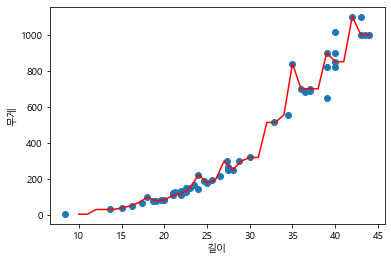

0.9823618210143489
15.267857142857142


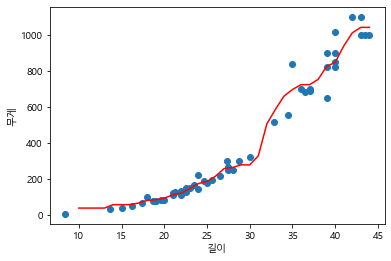

0.9793648682718722
30.569285714285716


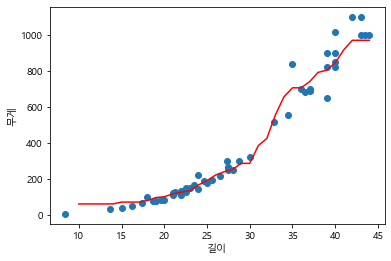

0.9758051075466483
35.35053571428572


In [6]:
model_knr_1 = KNeighborsRegressor()
model_knr_1.n_neighbors = 1
model_knr_1.fit(perch_length, perch_weight)

model_knr_5 = KNeighborsRegressor()
model_knr_5.n_neighbors = 5
model_knr_5.fit(perch_length, perch_weight)

model_knr_10 = KNeighborsRegressor()
model_knr_10.n_neighbors = 10
model_knr_10.fit(perch_length, perch_weight)


x = np.arange(10, 45).reshape(-1, 1)
prediction_line_k1 = model_knr_1.predict(x)

plt.rc('font', family = 'Malgun Gothic')
plt.xlabel('길이')
plt.ylabel('무게')

plt.scatter(perch_length, perch_weight)
plt.plot(x, prediction_line_k1, "r")

plt.show()

score_k1 = model_knr_1.score(perch_length, perch_weight)
print(score_k1)

score_mae_k1 = mean_absolute_error(perch_weight, model_knr_1.predict(perch_length))
print(score_mae_k1)


prediction_line_k5 = model_knr_5.predict(x)

plt.rc('font', family = 'Malgun Gothic')
plt.xlabel('길이')
plt.ylabel('무게')

plt.scatter(perch_length, perch_weight)
plt.plot(x, prediction_line_k5, "r")

plt.show()

score_k5 = model_knr_5.score(perch_length, perch_weight)
print(score_k5)

score_mae_k5 = mean_absolute_error(perch_weight, model_knr_5.predict(perch_length))
print(score_mae_k5)


prediction_line_k10 = model_knr_10.predict(x)

plt.rc('font', family = 'Malgun Gothic')
plt.xlabel('길이')
plt.ylabel('무게')

plt.scatter(perch_length, perch_weight)
plt.plot(x, prediction_line_k10, "r")

plt.show()

score_k10 = model_knr_10.score(perch_length, perch_weight)
print(score_k10)

score_mae_k10 = mean_absolute_error(perch_weight, model_knr_10.predict(perch_length))
print(score_mae_k10)